<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

					
	소매점 판매 현황				
					
	가상으로 만들어진 2016년 2017년 소매점 판매 데이터				
					
	파일1: customers.csv				
	- CustomerID: 고객 코드				
	- RegisterDate : 가입일				
	- Address: 상세 주소				
	- Gender: 성별				
	- BirthYear: 출생연도				
	- Addr1: 시도				
	- Addr2: 구군				
					
	파일2: products.csv				
	- ProductID: 상품 코드				
	- ProductName: 상품 이름				
	- Category: 대분류				
	- SubCategory : 소분류				
	- CategoryOrd: 대분류 순서(의미없음)				
					
	파일3: orders.csv				
	- OrderID: 주문번호				
	- Seq: 일련 변호				
	- OrderDate: 주문일				
	- ProductID: 상품 코드				
	- Qty: 수량				
	- Amt : 금액				
	- CustomerID: 고객 코드				

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 필요한 라이브러리와 대상 파일을 읽어옵니다.
- 시각화에 한글이 포함될 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv
- 파일 경로2: https://raw.githubusercontent.com/Jangrae/csv/master/products.csv
- 파일 경로3: https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv

In [3]:

path1 = 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'
customers = pd.read_csv(path1)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [4]:

path2 = 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
products = pd.read_csv(path2)
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [5]:

path3 = 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
orders = pd.read_csv(path3)
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers)**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [6]:
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [7]:
customers.shape

(2243, 7)

In [8]:
customers.value_counts()

CustomerID  RegisterDate  Address               Gender  BirthYear  Addr1  Addr2
c017487     2002-07-31    경기 성남시 중원구 둔촌대로190번길  F       1968       경기도    성남시      1
c306719     2014-01-26    서울특별시 은평구 연서로         F       1969       서울특별시  은평구      1
c305895     2014-01-14    경기도 의왕시 갈미1로          F       1979       경기도    의왕시      1
c305921     2014-01-14    서울특별시 강서구 화곡로13길      F       1977       서울특별시  강서구      1
c306199     2014-01-17    경기도 고양시 일산동구 애니골길     F       1977       경기도    고양시      1
                                                                                  ..
c149838     2010-02-22    경기도 의왕시 갈미1로          F       1970       경기도    의왕시      1
c149615     2010-02-19    서울특별시 종로구  옥인길        F       1979       서울특별시  종로구      1
c149399     2010-02-16    경기도 안성시 삼죽면 삼백로       F       1973       경기도    안성시      1
c148979     2010-02-08    경기도 김포시 청송로           F       1955       경기도    김포시      1
c402634     2017-03-30    경기도 용인시 수지구 죽전로       F       1960       경기도

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [10]:
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [11]:
customers.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

**2) 상품 정보(products)**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [12]:
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [13]:
products['CategoryOrd'].value_counts()

5    23
4    14
3    11
1     8
2     6
Name: CategoryOrd, dtype: int64

In [14]:
products.shape

(62, 5)

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [16]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

**3) 주문 정보(orders)**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [17]:
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [19]:
orders.isna().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.

In [20]:
#조인
total = pd.merge(products,orders, on = 'ProductID', how = 'inner' )
total = pd.merge(total, customers, on = 'CustomerID' , how = 'inner')

total.isna().sum()


ProductID       0
ProductName     0
Category        0
SubCategory     0
CategoryOrd     0
OrderID         0
Seq             0
OrderDate       0
Qty             0
Amt             0
CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [137]:
#필요없는 열 제거


**2) 결과 확인**

In [138]:
total.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd,OrderID,Seq,OrderDate,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,p1001771,마늘,채소,뿌리채소,5,38,1,2016-01-02,1,3150,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시
1,p1001771,마늘,채소,뿌리채소,5,15,3,2016-03-01,1,3300,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시
2,p1001771,마늘,채소,뿌리채소,5,28,6,2016-03-16,1,3300,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시
3,p1001771,마늘,채소,뿌리채소,5,4,1,2016-08-28,1,3100,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시
4,p1001771,마늘,채소,뿌리채소,5,57,1,2016-11-18,1,3100,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

In [21]:

total['OrderYear'] = pd.to_datetime(total['OrderDate']).dt.year
total['OrderMonth'] = pd.to_datetime(total['OrderDate']).dt.month 
total['Age'] = 2017 - total['BirthYear']

## 고객별 총 이용금액 열 추가 Qty * Amt
total['total_bill'] = total['Qty'] * total['Amt']


total.head()



,ProductID,ProductName,Category,SubCategory,CategoryOrd,OrderID,Seq,OrderDate,Qty,Amt,...,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderYear,OrderMonth,Age,total_bill
0,p1001771,마늘,채소,뿌리채소,5,38,1,2016-01-02,1,3150,...,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,1,37,3150
1,p1001771,마늘,채소,뿌리채소,5,15,3,2016-03-01,1,3300,...,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,3,37,3300
2,p1001771,마늘,채소,뿌리채소,5,28,6,2016-03-16,1,3300,...,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,3,37,3300
3,p1001771,마늘,채소,뿌리채소,5,4,1,2016-08-28,1,3100,...,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,8,37,3100
4,p1001771,마늘,채소,뿌리채소,5,57,1,2016-11-18,1,3100,...,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,11,37,3100


In [157]:
total.head(30)

,CategoryOrd,OrderID,Seq,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,OrderYear,OrderMonth,Age,total_bill
0,5,38,1,1,3150,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,1,37,3150
1,5,15,3,1,3300,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,3,37,3300
2,5,28,6,1,3300,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,3,37,3300
3,5,4,1,1,3100,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,8,37,3100
4,5,57,1,1,3100,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,11,37,3100
5,5,28,1,1,3100,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,12,37,3100
6,5,9,8,1,2800,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2017,1,37,2800
7,5,56,10,1,2950,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2017,3,37,2950
8,2,30,6,1,11000,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2016,3,37,11000
9,2,56,8,1,10700,c115512,2008-11-20,경기도 김포시 전원로,F,1980,경기도,김포시,2017,3,37,10700


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [22]:
del_cols =['ProductName','Category','OrderDate','ProductID','SubCategory']
del_col = ['OrderDate', 'ProductID', 'CategoryOrd', 'Address']
total.drop(columns = del_col, axis = 1, inplace = True)

total.head()

#tmpc total_bill 에 대한 분석 
useful_cols = ['CustomerID','Category','Gender','Age','Addr1','Addr2','Qty','Amt','total_bill']
tmpc = total[useful_cols]

tmpc.head()

,CustomerID,Category,Gender,Age,Addr1,Addr2,Qty,Amt,total_bill
0,c115512,채소,F,37,경기도,김포시,1,3150,3150
1,c115512,채소,F,37,경기도,김포시,1,3300,3300
2,c115512,채소,F,37,경기도,김포시,1,3300,3300
3,c115512,채소,F,37,경기도,김포시,1,3100,3100
4,c115512,채소,F,37,경기도,김포시,1,3100,3100


In [31]:
####여기#################################

In [30]:
tmpc.columns = ['CustomerID','카테고리', '성별', '나이', '시도', '구군', '수량', '금액',
       '총판매액']

tmpc.head()

,CustomerID,카테고리,성별,나이,시도,구군,수량,금액,총판매액
0,c115512,채소,F,37,경기도,김포시,1,3150,3150
1,c115512,채소,F,37,경기도,김포시,1,3300,3300
2,c115512,채소,F,37,경기도,김포시,1,3300,3300
3,c115512,채소,F,37,경기도,김포시,1,3100,3100
4,c115512,채소,F,37,경기도,김포시,1,3100,3100


In [29]:
tmp = tmpc.groupby(by = ['CustomerID','카테고리'], as_index = [False,False])['총판매액'].sum()


(6940,)

## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

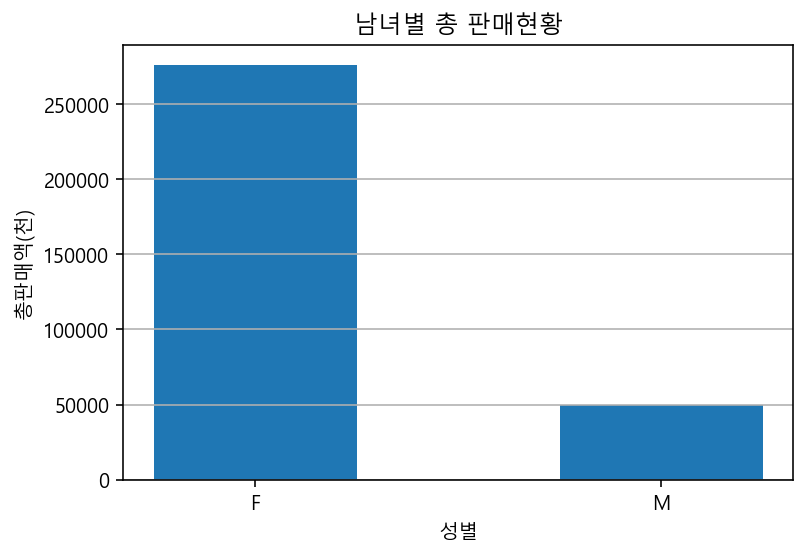

In [142]:
tmp = tmpc.groupby(by='성별', as_index = False)['총판매액'].sum()


# plt.figure(figsize = (8,6))
plt.bar(tmp['성별'], tmp['총판매액']/1000,width = 0.5)
plt.title('남녀별 총 판매현황')
plt.xlabel('성별')
plt.ylabel('총판매액(천)')
plt.grid(axis = 'y')
plt.ticklabel_format(axis='y',style='plain') # y값을 지수형태가아닌 원래 값이 보니게함
plt.show()


**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

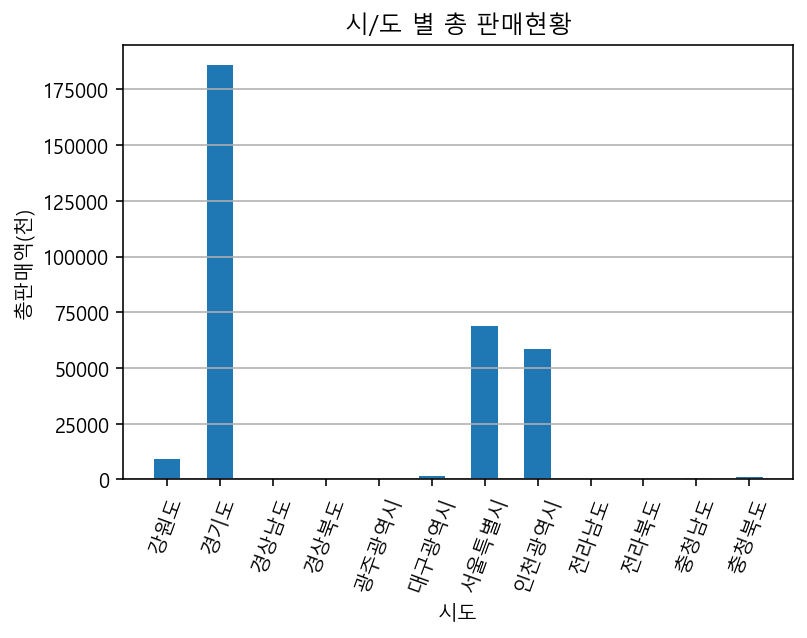

In [143]:
tmp = tmpc.groupby(by='시도', as_index = False)['총판매액'].sum()

plt.bar(tmp['시도'], tmp['총판매액']/1000,width = 0.5)
plt.title('시/도 별 총 판매현황')
plt.xlabel('시도')
plt.ylabel('총판매액(천)')
plt.grid(axis = 'y')
plt.ticklabel_format(axis='y',style='plain') 
plt.xticks(rotation = 70)
plt.show()


**3)추가 최근 구매 고객별 매출액으로 순환률을 알아보자** 

**4) 추가**

**5) 추가**

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [144]:
tmpc.head(2)

,CustomerID,성별,나이,시도,구군,수량,금액,총판매액
0,c115512,F,37,경기도,김포시,1,3150,3150
1,c115512,F,37,경기도,김포시,1,3300,3300


In [39]:
cst = tmpc.groupby(by ='CustomerID', as_index = False)[['수량','총판매액']].sum()

cst.head()

,CustomerID,수량,총판매액
0,c017487,127,545557
1,c017503,42,170624
2,c017517,192,596136
3,c017522,64,253349
4,c017526,26,64681


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [146]:
cst.describe().apply(lambda x : x.apply('{:,.1f}'.format))

,수량,총판매액
count,"2,237.0","2,237.0"
mean,39.0,"145,538.5"
std,63.2,"587,485.4"
min,1.0,273.0
25%,4.0,"9,850.0"
50%,13.0,"37,410.0"
75%,47.0,"137,210.0"
max,"1,008.0","19,605,368.0"


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
- '총판매액' 을 기준으로 함
    - descirbe() 를 통해 
    -  Falmily ~ 3000 
    -  Bronze ~ 9,850 25프로
    -  Silver ~ 37,410 50프로
    -  Gole ~137,210 ,75%
    - Platinum  137,210~ 

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [147]:
import numpy as np

In [189]:

#cut() 함수
q1 = 3000
q2 = cst.describe().loc['25%','총판매액']
q3 = cst.describe().loc['50%','총판매액']
q4 = cst.describe().loc['75%','총판매액']
my_bin = [-np.inf, q1, q2, q3,q4, np.inf] # -np.inf 마이너스 무한대/ 경계값은 왼쪾에 포함 
label = ['Family', 'Bronze', 'Silver', 'Gold','Platinum']

cst['등급'] = pd.cut( cst['총판매액'] , bins = my_bin  , labels = label )
# 확인
cst['등급'].value_counts()

# 결론 플레 골드 실버가 너무많아 수정요망

Gold        559
Platinum    559
Silver      558
Bronze      365
Family      196
Name: 등급, dtype: int64

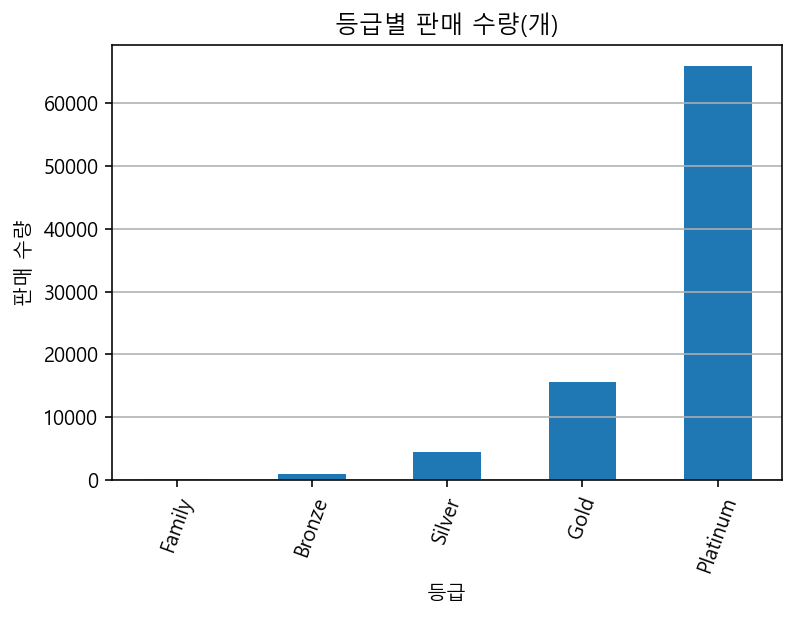

In [190]:
tmp = cst.groupby(by = '등급', as_index = False)['수량'].sum()
tmp = tmp.sort_values(by = '등급', ascending = True)

# plt.figure(figsize = (8,6))
plt.bar(tmp['등급'] , tmp['수량'], width = 0.5)
plt.title('등급별 판매 수량(개)')
plt.xlabel('등급')
plt.ylabel('판매 수량')
plt.grid(axis = 'y')
plt.ticklabel_format(axis='y',style='plain') # y값을 지수형태가아닌 원래 값이 보니게함
plt.xticks(rotation = 70)
plt.show()

- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [40]:


q1 = 30000
q2 = 100000
q3 = 300000
q4 = 600000
# q1 = cst.describe().loc['25%','총판매액']
# q2 = cst.describe().loc['50%','총판매액']
# q3 = cst['총판매액'].mean()
# q4 = cst['총판매액'].mean() + 250000
my_bin = [-np.inf, q1, q2, q3,q4, np.inf] # -np.inf 마이너스 무한대/ 경계값은 왼쪾에 포함 
label = ['Family', 'Bronze', 'Silver', 'Gold','Platinum']

cst['등급'] = pd.cut( cst['총판매액'] , bins = my_bin  , labels = label )
# 확인
cst['등급'].value_counts()

#타당해보임

Family      1009
Bronze       525
Silver       420
Gold         187
Platinum      96
Name: 등급, dtype: int64

In [41]:
cst.head()

,CustomerID,수량,총판매액,등급
0,c017487,127,545557,Gold
1,c017503,42,170624,Silver
2,c017517,192,596136,Gold
3,c017522,64,253349,Silver
4,c017526,26,64681,Bronze


In [42]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  2237 non-null   object  
 1   수량          2237 non-null   int64   
 2   총판매액        2237 non-null   int64   
 3   등급          2237 non-null   category
dtypes: category(1), int64(2), object(1)
memory usage: 72.3+ KB


## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

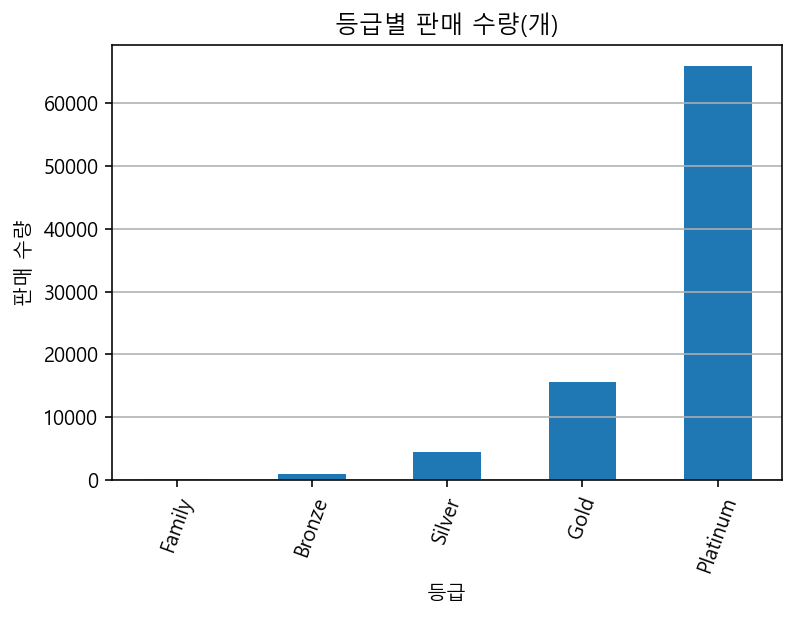

In [175]:
tmp = cst.groupby(by = '등급', as_index = False)['수량'].sum()
tmp = tmp.sort_values(by = '등급', ascending = True)

# plt.figure(figsize = (8,6))
plt.bar(tmp['등급'] , tmp['수량'], width = 0.5)
plt.title('등급별 판매 수량(개)')
plt.xlabel('등급')
plt.ylabel('판매 수량')
plt.grid(axis = 'y')
plt.ticklabel_format(axis='y',style='plain') # y값을 지수형태가아닌 원래 값이 보니게함
plt.xticks(rotation = 70)
plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

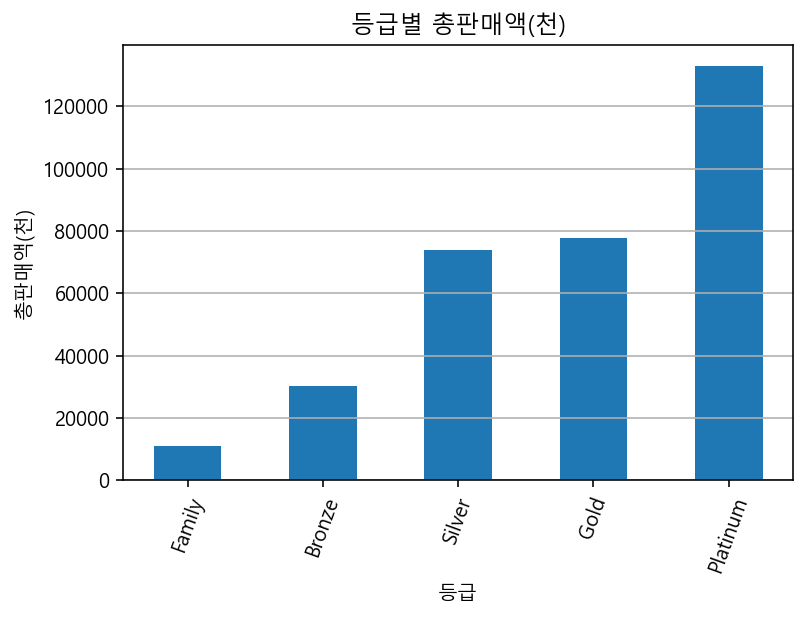

In [193]:
tmp = cst.groupby(by = '등급', as_index = False)['총판매액'].sum()
tmp = tmp.sort_values(by = '등급', ascending = True)

# plt.figure(figsize = (8,6))
plt.bar(tmp['등급'] , tmp['총판매액']/1000, width = 0.5)
plt.title('등급별 총판매액(천)')
plt.xlabel('등급')
plt.ylabel('총판매액(천)')
plt.grid(axis = 'y')
plt.ticklabel_format(axis='y',style='plain') # y값을 지수형태가아닌 원래 값이 보니게함
plt.xticks(rotation = 70)
plt.show()



**3) 추가 분석결과를 통해**
- merge 한 통합 raw데이터에 고객별 등급을 추가하여 등급별 분석을 해보자

- total1 이라는 새로운 데이터 셋을 만든다

In [184]:
#조인
total1 = pd.merge(products,orders, on = 'ProductID', how = 'inner' )
total1 = pd.merge(total1, customers, on = 'CustomerID' , how = 'inner')
total1.tail()

,ProductID,ProductName,Category,SubCategory,CategoryOrd,OrderID,Seq,OrderDate,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
68834,p1284851,유기농우유,유제품,우유,4,8,1,2016-12-13,1,2750,c090177,2007-07-03,서울 은평구 서오릉로17길,F,1970,서울특별시,은평구
68835,p1284851,유기농우유,유제품,우유,4,32,1,2017-02-24,1,2750,c399799,2017-02-24,인천광역시 연수구 원인재로,M,1983,인천광역시,연수구
68836,p1284851,유기농우유,유제품,우유,4,9,1,2017-03-17,1,2750,c214450,2011-11-14,서울특별시 강북구 인수봉로79다길,M,1979,서울특별시,강북구
68837,p1284851,유기농우유,유제품,우유,4,35,1,2017-03-19,1,2750,c400735,2017-03-09,경기도 남양주시 와부읍 덕소로,F,1970,경기도,남양주시
68838,p1299491,당근,채소,뿌리채소,5,22,1,2017-03-04,1,2150,c193555,2011-05-10,경기도 김포시 승가로,F,1968,경기도,김포시


In [186]:
# 고객 정보를 위해 연령 추가
total1['Age'] = 2017 - total1['BirthYear']

## 고객별 총 이용금액 열 추가 Qty * Amt
total1['total_bill'] = total1['Qty'] * total1['Amt']

# 고객별 고객등급 분류후 열 추가
total1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68839 entries, 0 to 68838
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     68839 non-null  object
 1   ProductName   68839 non-null  object
 2   Category      68839 non-null  object
 3   SubCategory   68839 non-null  object
 4   CategoryOrd   68839 non-null  int64 
 5   OrderID       68839 non-null  int64 
 6   Seq           68839 non-null  int64 
 7   OrderDate     68839 non-null  object
 8   Qty           68839 non-null  int64 
 9   Amt           68839 non-null  int64 
 10  CustomerID    68839 non-null  object
 11  RegisterDate  68839 non-null  object
 12  Address       68839 non-null  object
 13  Gender        68839 non-null  object
 14  BirthYear     68839 non-null  int64 
 15  Addr1         68839 non-null  object
 16  Addr2         68839 non-null  object
 17  Age           68839 non-null  int64 
 18  total_bill    68839 non-null  int64 
dtypes: i

**4) 추가**

In [ ]:
total1 = pd.merge(total1,tmpc, on= 'CustomerID', how = 'inner')
total1.head(50)
 
 

**5) 추가**

In [43]:
total1 = pd.merge(cst,total, on = 'CustomerID',how = 'outer')
total1.head()
 

,CustomerID,수량,총판매액,등급,ProductName,Category,SubCategory,OrderID,Seq,Qty,Amt,RegisterDate,Gender,BirthYear,Addr1,Addr2,OrderYear,OrderMonth,Age,total_bill
0,c017487,127,545557,Gold,마늘,채소,뿌리채소,48,1,1,3300,2002-07-31,F,1968,경기도,성남시,2016,3,49,3300
1,c017487,127,545557,Gold,마늘,채소,뿌리채소,26,1,1,3300,2002-07-31,F,1968,경기도,성남시,2016,4,49,3300
2,c017487,127,545557,Gold,마늘,채소,뿌리채소,1,1,1,3100,2002-07-31,F,1968,경기도,성남시,2016,9,49,3100
3,c017487,127,545557,Gold,마늘,채소,뿌리채소,21,1,1,3100,2002-07-31,F,1968,경기도,성남시,2016,12,49,3100
4,c017487,127,545557,Gold,마늘,채소,뿌리채소,56,3,1,3100,2002-07-31,F,1968,경기도,성남시,2016,12,49,3100


In [ ]:
total1.info()

In [49]:
total1 = total1.groupby(by = ['등급','Category'], as_index = [False,False])['total_bill'].sum()
total1.head(100)

등급        Category
Family    간식            812565
          과일           2353330
          반찬류          2599603
          유제품          1871955
          채소           3217827
Bronze    간식           2790331
          과일           5992329
          반찬류          7353925
          유제품          5814963
          채소           8258320
Silver    간식           6498611
          과일          16877388
          반찬류         15939113
          유제품         15527910
          채소          19175580
Gold      간식           7229848
          과일          16584859
          반찬류         12861999
          유제품         22016348
          채소          18876734
Platinum  간식          48063058
          과일          19255023
          반찬류         10863475
          유제품         31787867
          채소          22946630
Name: total_bill, dtype: int64

In [52]:
plt.bar(total1['등급'],total1['Category'])
plt.show()

KeyError: '등급'

## 7.비즈니스 제안

- 위 진행된 내용을 기반으로 판매 향상 등을 위한 비즈니스 제안을 합니다.

- 주어진 실습으로 볼 때 등급별로 판매수량이 linear 하게 증가하지만, 총판매액은 exponential 하게 증가함을 확인 할 수 있었다.
- 이로인해 등급이 높아질수록 비교적 비싼물건을 산다는 가설을 세워 보았고, 의미 있는 고객등급 필터가 될 수 있다고 판단하였다.

- 이를 원본데이터 적용하여 고객등급 별로 어떤 품목들이 비싼가격임에도 팔렸는지, 같은 가격인데 안 팔린 물건들이 있는지 등에 대한 소비자 선호하는 물품들을 조사를 진행해보고싶다.
- 이에 해당하는 물건들은 000,000 가 대표적 예로 할인행사를 진행할 필요가 있어보인다.
- 

## 8.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 판매액 / 수량 의 식을 추가하여 품목별 단위판매액을 구해보자
- 수량이 많아서 인지 비싼걸 사서인지 분석
- 수량이 많아서 라면 어떤 서비스 제공
- 비싼걸 사서라면 페이벡 시스템 제공

**2) 기타**

- 
- 
- 
- 
- 

**1) 의견**




